# RFM analysis project



## Описание проекта

Небольшой пэт-проект по RFM анализу(метод анализа клиентов на основе их поведения: Recency, Frequency, Monetary):

* Вводные данные были сгенерированы с помощью AI.

* На основе данных сегментируем пользователей и выделяем их ключевые характеристики.

* Строим barplot и heatmap для представления результатов.

* Сохраняем результат в файл reports, вместе с графиками.



## Описание данных


* CustomerID – уникальный идентификатор клиента.

* InvoiceDate – дата покупки.

* InvoiceID – номер счета/чека.

* ProductID – уникальный идентификатор товара.

* Quantity – количество проданных единиц товара.

* Price – цена за единицу товара.

* TotalAmount – общая сумма по строке (Quantity * Price).

## Подготовка данных

In [94]:

import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns



In [95]:
df = pd.read_csv(r'C:\Users\sinic\Projects_Repositories\RFM_analysis\data\external\rfm_sales_data.csv')
    

In [96]:

def first_info(df):
    display(df.head(4))
    display(df.tail(1))
    display(df.info())
    print('Кол-во дубликатов: ', df.duplicated().sum())
    print('Кол-во неявных дубликатво: ', df[['CustomerID','ProductID','TotalAmount']].duplicated().sum())
    print(f"Уникальных покупателей: {df['CustomerID'].nunique()}")

first_info(df)

,CustomerID,InvoiceID,InvoiceDate,ProductID,Quantity,Price,TotalAmount
0,CUST_46,INV_7894,2023-01-01 03:16:23,PROD_23,8,110.76,886.08
1,CUST_98,INV_2691,2023-01-01 13:10:11,PROD_11,8,26.70,213.60
2,CUST_51,INV_9207,2023-01-01 14:22:28,PROD_11,7,34.33,240.31
3,CUST_36,INV_9470,2023-01-01 14:35:17,PROD_33,10,488.50,4885.00


,CustomerID,InvoiceID,InvoiceDate,ProductID,Quantity,Price,TotalAmount
999,CUST_70,INV_2226,2024-01-01 14:12:34,PROD_33,10,285.36,2853.6


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CustomerID   1000 non-null   object 
 1   InvoiceID    1000 non-null   object 
 2   InvoiceDate  1000 non-null   object 
 3   ProductID    1000 non-null   object 
 4   Quantity     1000 non-null   int64  
 5   Price        1000 non-null   float64
 6   TotalAmount  1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


None

Кол-во дубликатов:  0
Кол-во неявных дубликатво:  0
Уникальных покупателей: 100


In [97]:
# Приведем название столбцов к общему виду и удобному виду.
df.rename(columns={
    "CustomerID": "customer_id",
    "InvoiceID": "invoice_id",
    "InvoiceDate": "invoice_date",
    "ProductID": "product_id",
    "TotalAmount": 'total_amount',
    "Quantity": "quantity",
    "Price": "price",
    },inplace=True)

In [98]:
# Меняем тип данных
df['invoice_date'] = df['invoice_date'].apply(pd.to_datetime)

# Для удобства будем считать настоящей дату на 1 день больше максимальной
current_date = df['invoice_date'].max() + dt.timedelta(days=1)

Заключение 1 этапа:

* Был загружен файл CSV с данными.

* Дубликатов и пустых значений найдено не было. 7 столбцов и 1000 строк в фрейме.

* Всего 100 уникальных пользователей.

* Данные с датами были переведены в нужный формат.

## Вычисление показателей RFM

In [99]:
# Вычисление RFM показателей
rfm = df.groupby('customer_id').agg({
    'invoice_date': lambda x: (current_date - x.max()).days,
    'invoice_id': 'nunique',
    'total_amount': 'sum'
}).reset_index()

rfm.columns = ['customer_id','recency', 'frequency', 'monetary']

display(rfm.head())

,customer_id,recency,frequency,monetary
0,CUST_1,7,12,9175.99
1,CUST_10,35,7,11365.12
2,CUST_100,36,6,5420.79
3,CUST_11,66,10,9623.72
4,CUST_12,38,5,9756.60


In [100]:
# Квантильные значения

rfm['r_score']= pd.qcut(rfm['recency'],5, labels=[5,4,3,2,1]) # Чем меньше значение recency, тем больше оценка.

rfm['f_score']= pd.qcut(rfm['frequency'],5, labels=range(1,6))

rfm['m_score']= pd.qcut(rfm['monetary'],5,labels=range(1,6))

rfm['rfm_score']= rfm['r_score'].astype(str) + rfm['f_score'].astype(str) + rfm['m_score'].astype(str)      
print(rfm.head)

<bound method NDFrame.head of    customer_id  recency  frequency  monetary r_score f_score m_score rfm_score
0       CUST_1        7         12   9175.99       5       4       1       541
1      CUST_10       35          7  11365.12       3       1       2       312
2     CUST_100       36          6   5420.79       2       1       1       211
3      CUST_11       66         10   9623.72       1       3       1       131
4      CUST_12       38          5   9756.60       2       1       2       212
..         ...      ...        ...       ...     ...     ...     ...       ...
95     CUST_95        5         12  11845.99       5       4       2       542
96     CUST_96       58         11  12124.10       1       3       2       132
97     CUST_97       94          8  11774.80       1       2       2       122
98     CUST_98        9         12  16257.65       5       4       4       544
99     CUST_99       15         10  16799.16       4       3       4       434

[100 rows x 8 columns

In [101]:
def assign_rfm_segment(row):
    r = row['r_score']
    f = row['f_score']
    m = row['m_score']
    
    # Основные группы по Recency
    if r >= 4:
        if f >= 4 and m >= 4:
            return 'Champions'
        elif f >= 3 and m >= 3:
            return 'Loyal Fans'
        elif f >= 2 and m >= 2:
            return 'Active Spenders'
        elif f >= 1 and m >= 1:
            return 'New Engagers'
    
    if r == 3:
        if f >= 4 and m >= 4:
            return 'Potential Champions'
        elif f >= 3 and m >= 3:
            return 'Core Customers'
        elif f >= 2 and m >= 2:
            return 'Need Attention'
        else:
            return 'Casual Shoppers'
    
    if r <= 2:
        if f >= 4 and m >= 4:
            if r == 2:
                return 'At-Risk Big Spenders'
            else:
                return 'Cant Lose Them'
        elif f >= 3 and m >= 3:
            return 'High Value Sleepers'
        elif f >= 2 and m >= 2:
            return 'Medium Value Sleepers'
        elif f >= 1 and m >= 1:
            return 'Low Activity'
    
    # Специальные случаи
    if m >= 4:
        if f <= 2:
            return 'Whales Needing Activation'
        elif r <= 2:
            return 'Sleeping Whales'
    
    if f >= 4 and m <= 2:
        return 'Frequent Low Spenders'
    
    if f <= 2 and m <= 2:
        return 'Window Shoppers'
    
    return 'Others'

rfm['segment'] = rfm.apply(assign_rfm_segment, axis=1)

Заключение по 2 этапу:

* Были расчитаны RFM показатели и создан 2 датафрейм (rfm).

* По RFM показателям составлены оценки от 1 до 5.

* Имея оцененные данные, была сделана сегментация пользователей по характеру показателей.



## Визуализация результатов

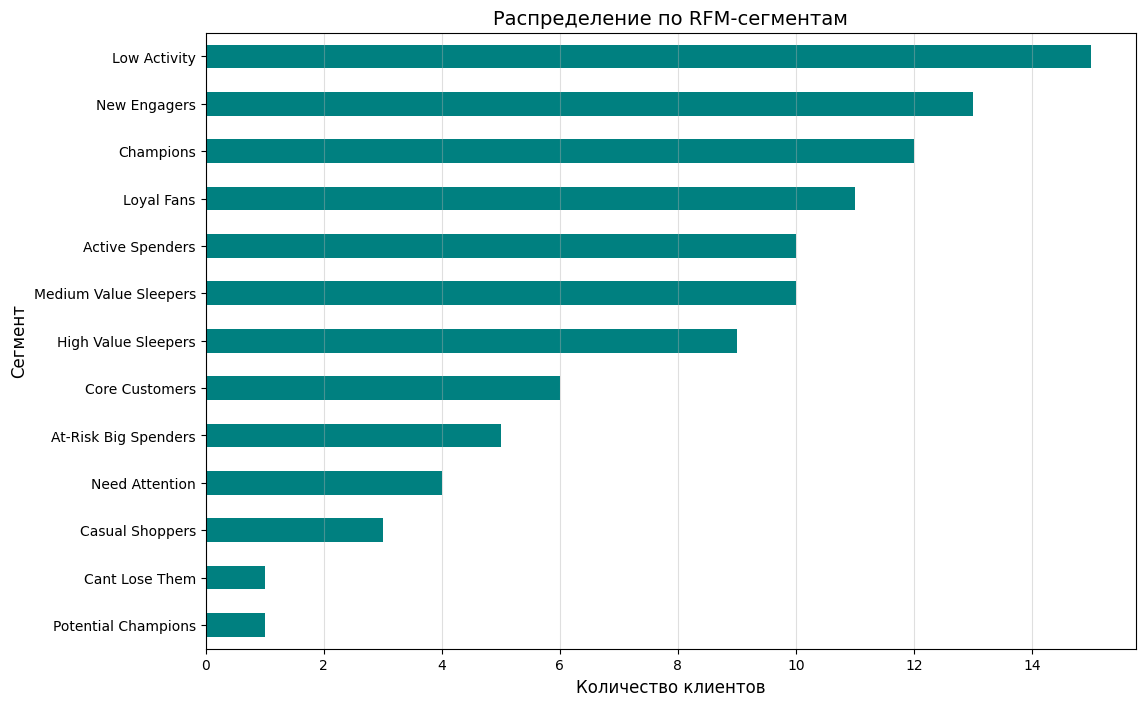

In [102]:
plt.figure(figsize=(12,8))
segments_plot = rfm['segment'].value_counts().sort_values(ascending=True)
segments_plot.plot(kind='barh', color='teal')
plt.title('Распределение по RFM-сегментам', fontsize=14)
plt.xlabel('Количество клиентов', fontsize=12)
plt.ylabel('Сегмент', fontsize=12)
plt.grid(axis='x', alpha=0.4)
plt.show()

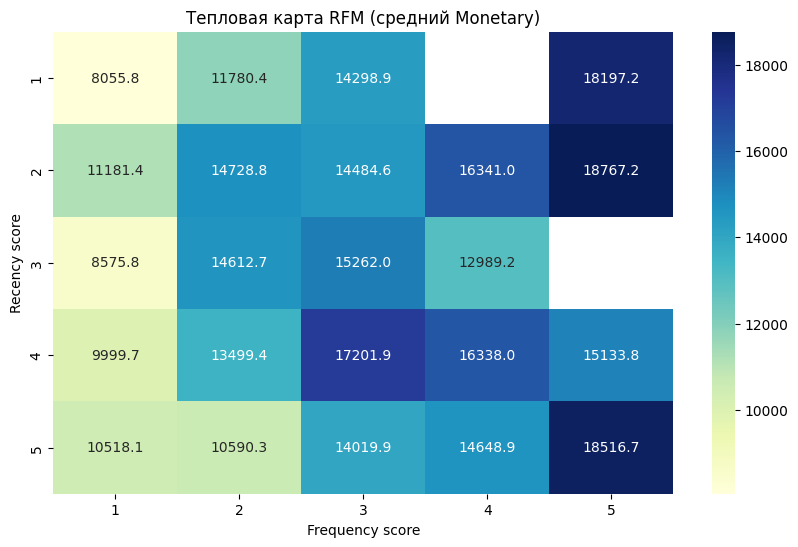

In [103]:
rfm['r_score'] = rfm['r_score'].astype(int)
rfm['f_score'] = rfm['f_score'].astype(int)
rfm['m_score'] = rfm['m_score'].astype(int)

rfm_avg = rfm.groupby(['r_score', 'f_score'])['monetary'].mean().reset_index()
rfm_pivot = rfm_avg.pivot(index='r_score', columns='f_score', values='monetary')

plt.figure(figsize=(10, 6))
sns.heatmap(rfm_pivot, annot=True, cmap='YlGnBu', fmt='.1f')
plt.title('Тепловая карта RFM (средний Monetary)')
plt.xlabel('Frequency score')
plt.ylabel('Recency score')
plt.show()

In [104]:
print(rfm.groupby('segment').agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': ['mean', 'count']
}).round(1))

                      recency frequency monetary      
                         mean      mean     mean count
segment                                               
Active Spenders          12.1       9.5  12425.5    10
At-Risk Big Spenders     50.0      14.0  20586.9     5
Cant Lose Them           79.0      14.0  18197.2     1
Casual Shoppers          32.0       6.3   8575.8     3
Champions                10.1      13.2  17942.6    12
Core Customers           25.7      10.8  14846.3     6
High Value Sleepers      61.9      11.4  15818.6     9
Low Activity             73.1       6.9   9434.2    15
Loyal Fans               11.4      11.4  15679.5    11
Medium Value Sleepers    72.2       8.9  12847.4    10
Need Attention           28.8      10.2  12240.3     4
New Engagers             10.1       8.0   9609.4    13
Potential Champions      29.0      12.0  19453.0     1


In [105]:
top_customers = rfm.sort_values(by='monetary', ascending=False)
top_customers[['customer_id','monetary','segment']]

# Сохраняем результат анализа в reports

# top_customers.to_csv('top_customers_2023_24.csv', index=False)

,customer_id,monetary,segment
12,CUST_2,25847.27,At-Risk Big Spenders
44,CUST_49,24650.30,At-Risk Big Spenders
90,CUST_90,23699.71,Champions
60,CUST_63,23372.17,Loyal Fans
59,CUST_62,23066.04,High Value Sleepers
...,...,...,...
70,CUST_72,7024.08,New Engagers
53,CUST_57,6496.27,Low Activity
40,CUST_45,6457.61,New Engagers
62,CUST_65,5852.66,Casual Shoppers


In [106]:
# Сохраняем результат анализа в reports

# rfm.to_csv('rfm_analysis_2023_24.csv', index=False)

Заключение по 3 этапу:

* Были выстроены графики:
    
    * BarhPlot: выводы по графику показали, что топ 3 категории пользователей - это Low activity customers, New Engagers и Champions и замыкают график Potential Champions, Cant Lose Them.

    * Heatmap: тепловая карта показала закономерный результат,что частые клиенты оставляют больше сумму, хотя можно заметить разрыв в Recency, что потратив однажды очень много, покупатели не возвращались.

* Результаты загружены в CSV файлы в папку reports вместе с графиками.

## Общий итог

Изучив сгенерированные данные, можно сделать следующий вывод:

* На уникальных 100 пользователей, получилась очень разновидная сегментация.

* Из 100 пользователей больше всего:

    * неактивных пользователей из этого следует, что нужны промоакции для привлечения.

    * Так называемые чемпионы, категория пользователей, которая часто посещает, покупает и тратит большие суммы. Для них и лояльных клиентов можно сделать персонализированную программу лояльности.

    * Новых пользователей тоже много, для данной категории, правильным решением будет создания механизмов вовлечения в продукт.